# Simulation of the $\cos(2\varphi)$ qubit

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

## Ideal case
### Charge basis

In [59]:
#From qutip.org
def hamiltonian_charge(N, Ec, Ej, ng):
    """
    Return the charge qubit hamiltonian as a Qobj instance.
    """
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) - 0.5 * Ej * (np.diag(np.ones(2*N-1), 2) + 
                                                               np.diag(np.ones(2*N-1), -2))
    return Qobj(m)

In [66]:
#parameters
N = 20
Ec = 1
Ej = 10
lvl_num = 5
ng_array = np.linspace(-2,2,401)
energies = np.zeros((len(ng_array), 2*N+1))

#Spectrum
for idx_ng, ng in enumerate (ng_array):
    energies[idx_ng,:] = hamiltonian_charge(N, Ec, Ej, ng).eigenenergies()  

(-2.0, 2.0)

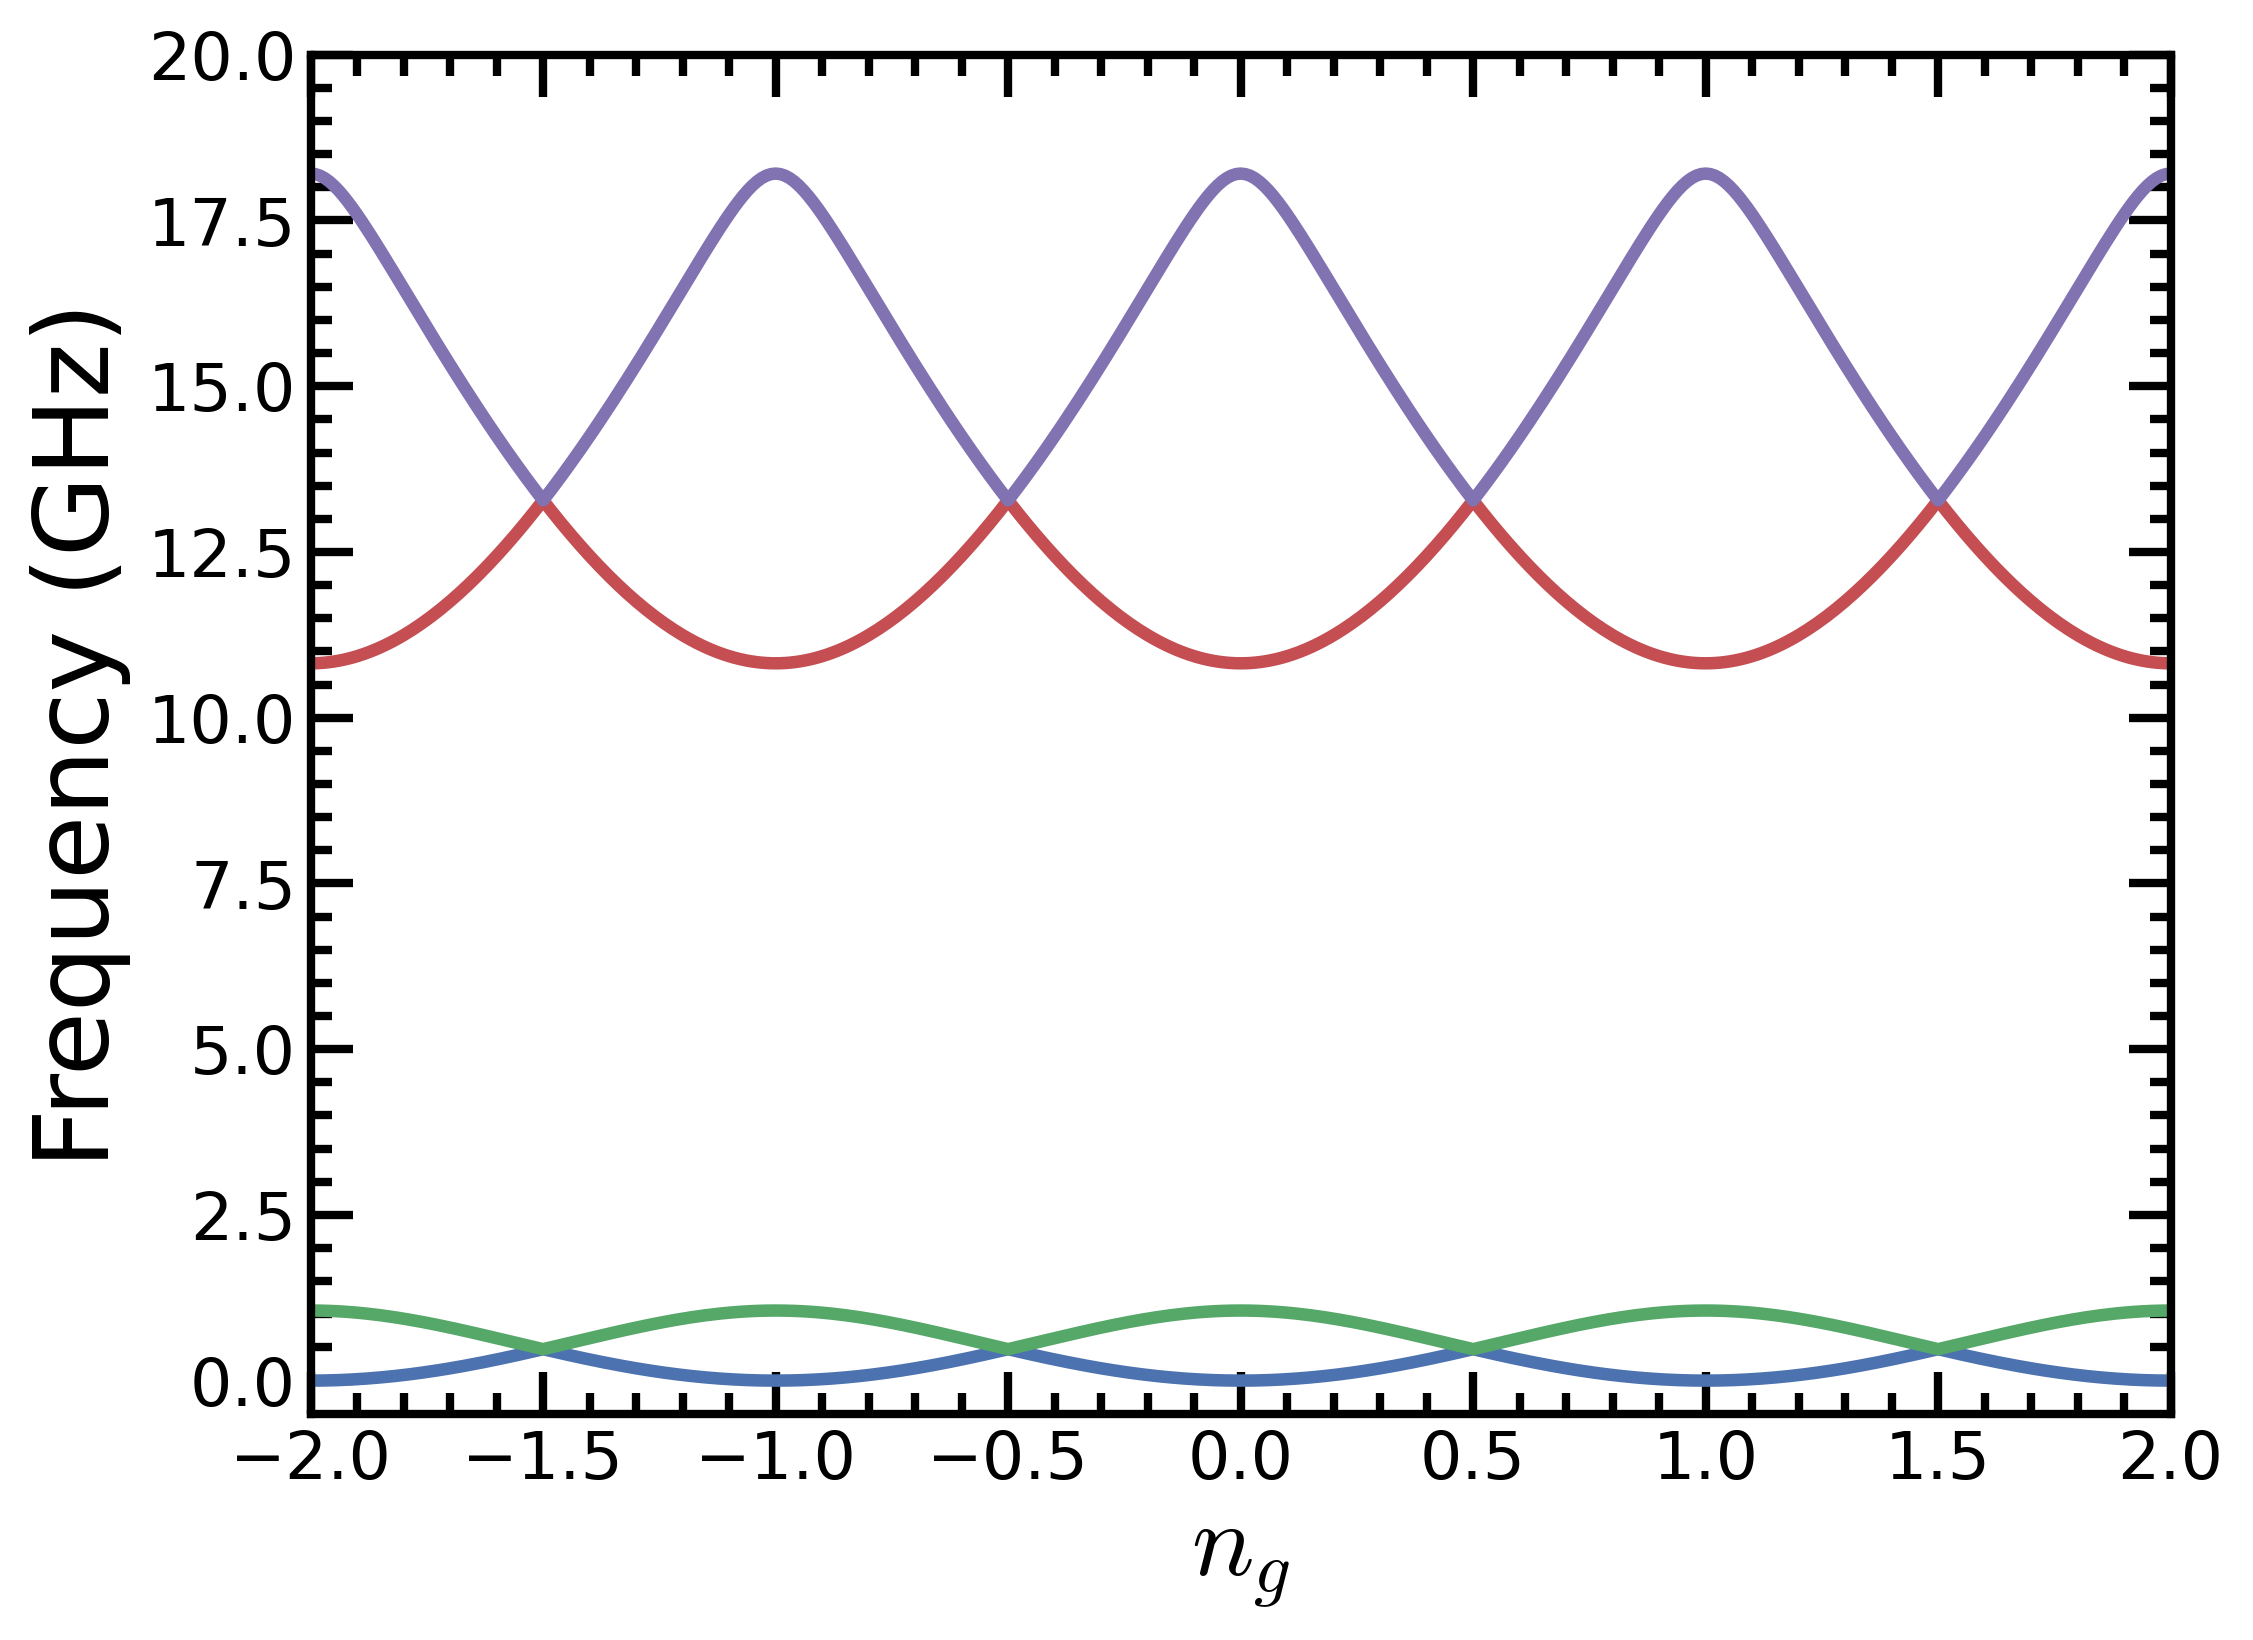

In [67]:
plt.figure(figsize=[8,6])
for idx_lvl in range(0,N):
    plt.plot(ng_array, energies[:,idx_lvl]-np.min(energies[:,0]))
plt.ylim([-0.5,20])
plt.xlabel('$n_g$')
plt.ylabel('Frequency (GHz)')
plt.xlim([ng_array[0], ng_array[-1]])
# plt.savefig('CPB_spectrum1.png')

In [68]:
#Wavefunctions in charge basis
ng = 0.0
energies = np.zeros(2*N+1)
wavefunction = np.zeros((2*N+1, 2*N+1))
energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   

<ipython-input-69-9f366a61bc61>:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


(-10.0, 10.0)

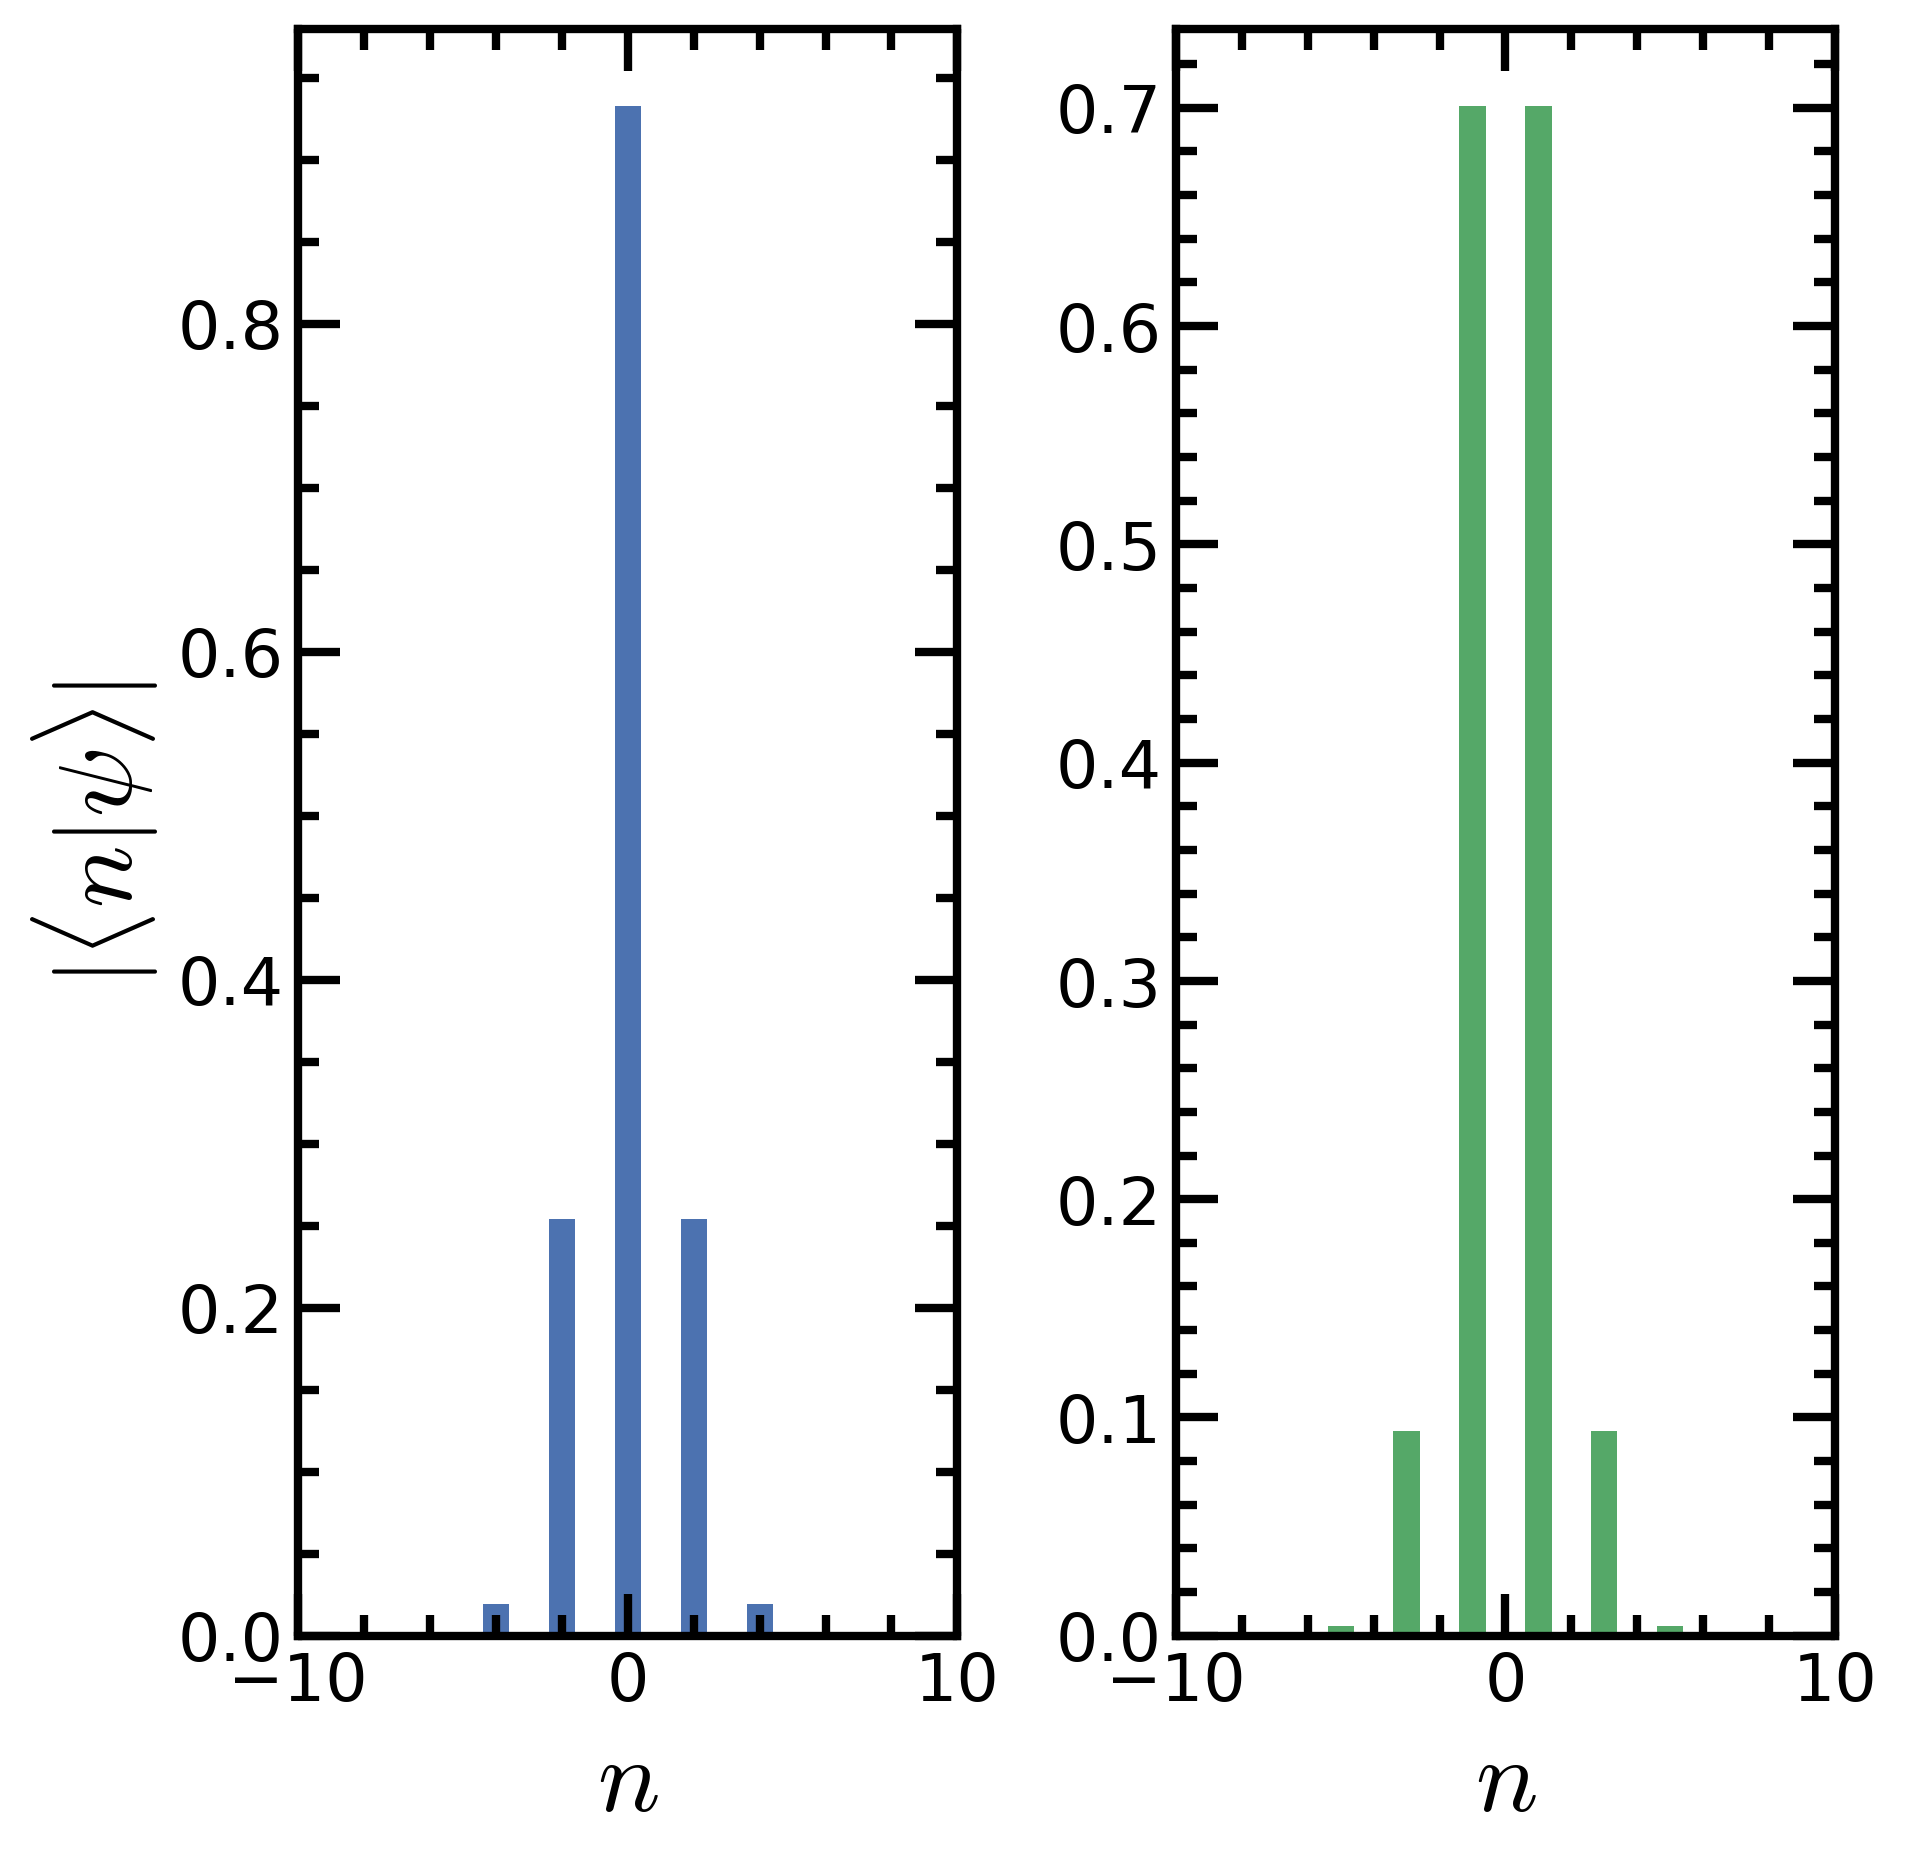

In [69]:
n = np.linspace(-N,N,2*N+1)
fig, ax = plt.subplots(1,2, figsize = [6,6], constrained_layout=True)
fig.tight_layout()
# plt.subplots_adjust(left = 0, right = 1.1)

state_to_plot = 0
ax[0].bar(n, abs(wavefunction[state_to_plot].full()[:,0]))
ax[0].set_xlabel('$n$')
ax[0].set_ylabel(r'$|\langle n|\psi \rangle | $')
ax[0].set_xlim([-10,10])

state_to_plot = 1
ax[1].bar(n, abs(wavefunction[state_to_plot].full()[:,0]), color = 'C1')
ax[1].set_xlabel('$n$')
# ax[1].set_ylabel(r'$|\langle n|$' + str(state_to_plot)+ r'$ \rangle |$')
ax[1].set_xlim([-10,10])


### Phase basis

In [140]:
#Solve in phase basis
Nphi = 601
Ej = 10
Ec = 1
ng = 0
phi = np.linspace(-0.5,1.5,2*Nphi+1)*np.pi
phi_op = np.diag(phi)
dphi = phi[-1]-phi[-2]
dphi_coeff = -1.0j/(2*dphi)
n_op = dphi_coeff*(np.diag(np.ones(2*Nphi), 1) - np.diag(np.ones(2*Nphi), -1))
def hamiltonian_phase(Ec, Ej, ng):
    m = 4*Ec*(Qobj(n_op)-ng)**2 - Ej*Qobj(2*phi_op).cosm()
    return m
energies, wavefunction = hamiltonian_phase(Ec, Ej, ng).eigenstates()
    

(-0.5, 1.5)

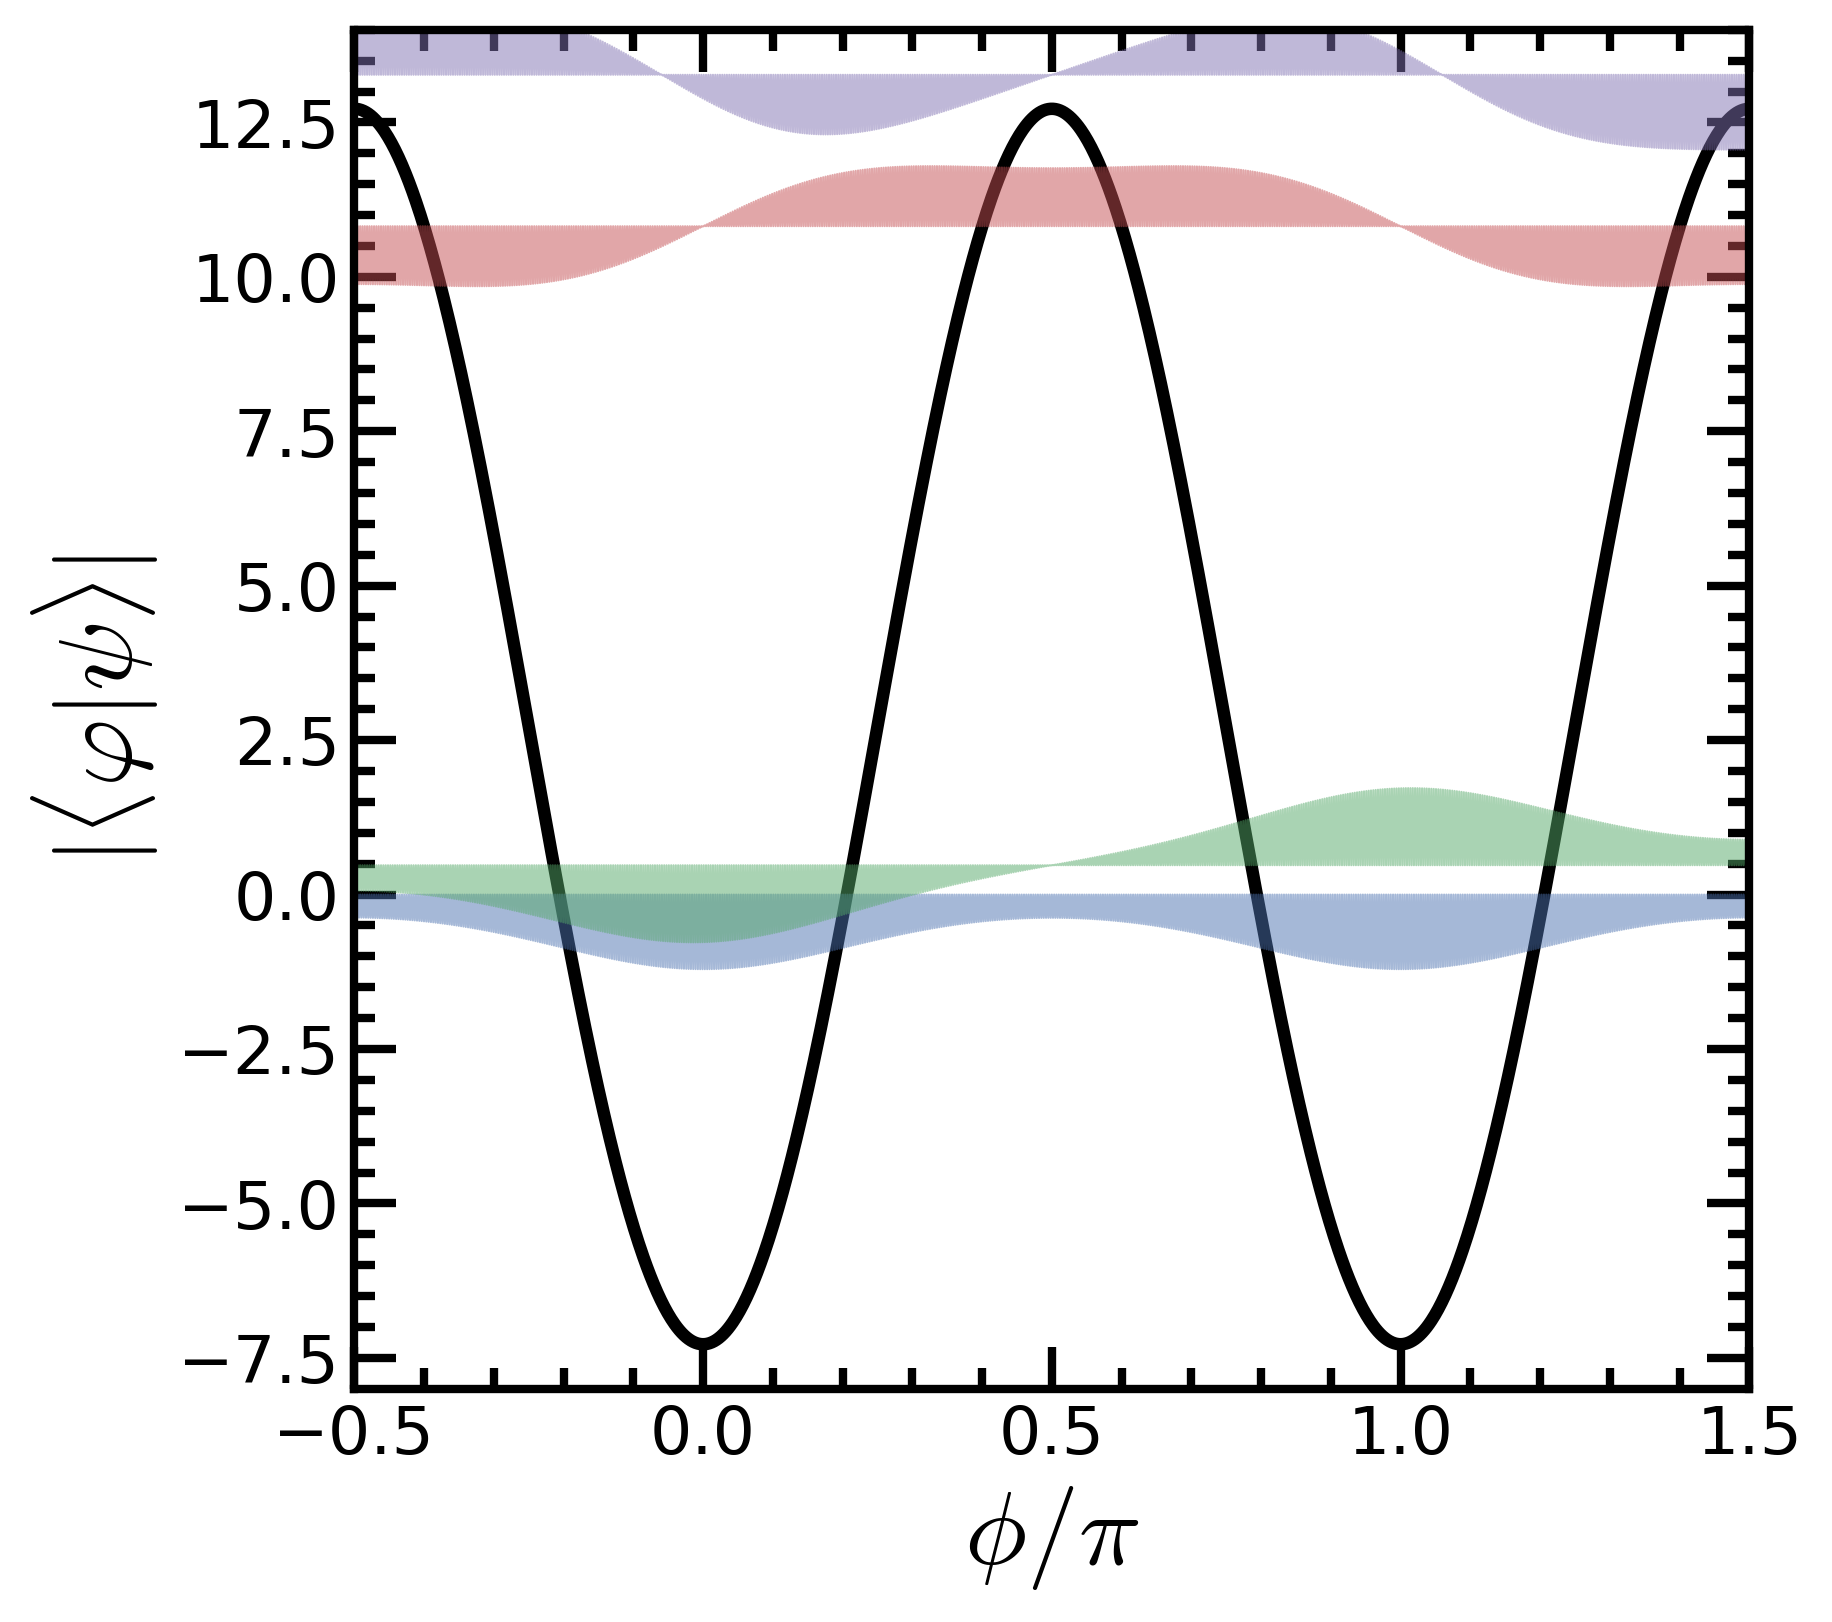

In [143]:
plt.figure(figsize =[6,6])
plt.plot(phi/np.pi, -Ej*np.cos(2*phi)-energies[0], color = 'k')
for state_to_plot in range(0,17,2):
    plt.plot(phi/np.pi, 2*np.real(wavefunction[state_to_plot].full()[:,0])*10+energies[state_to_plot]-energies[0], alpha = 0.5, linewidth = 0.5) 
plt.ylim([-8,14])
plt.xlabel('$\phi / \pi$')
plt.ylabel(r'$|\langle \varphi|\psi \rangle | $')
plt.xlim([phi[0]/np.pi, phi[-1]/np.pi])

## Non-ideal case 
### Charge basis


In [119]:
#From qutip.org
def hamiltonian_charge(N, Ec, Ej1,Ej2, ng):
    """
    Return the charge qubit hamiltonian as a Qobj instance.
    """
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) - 0.5 * Ej2 * (np.diag(np.ones(2*N-1), 2) + 
                                                               np.diag(np.ones(2*N-1), -2)) - 0.5 * Ej1 * (np.diag(np.ones(2*N), 1) + 
                                                               np.diag(np.ones(2*N), -1))
    return Qobj(m)

In [134]:
#parameters
N = 20
Ec = 1
Ej2 = 10
Ej1 = 0.5
lvl_num = 5
ng_array = np.linspace(-2,2,401)
energies = np.zeros((len(ng_array), 2*N+1))

#Spectrum
for idx_ng, ng in enumerate (ng_array):
    energies[idx_ng,:] = hamiltonian_charge(N, Ec, Ej1, Ej2, ng).eigenenergies()  

(-2.0, 2.0)

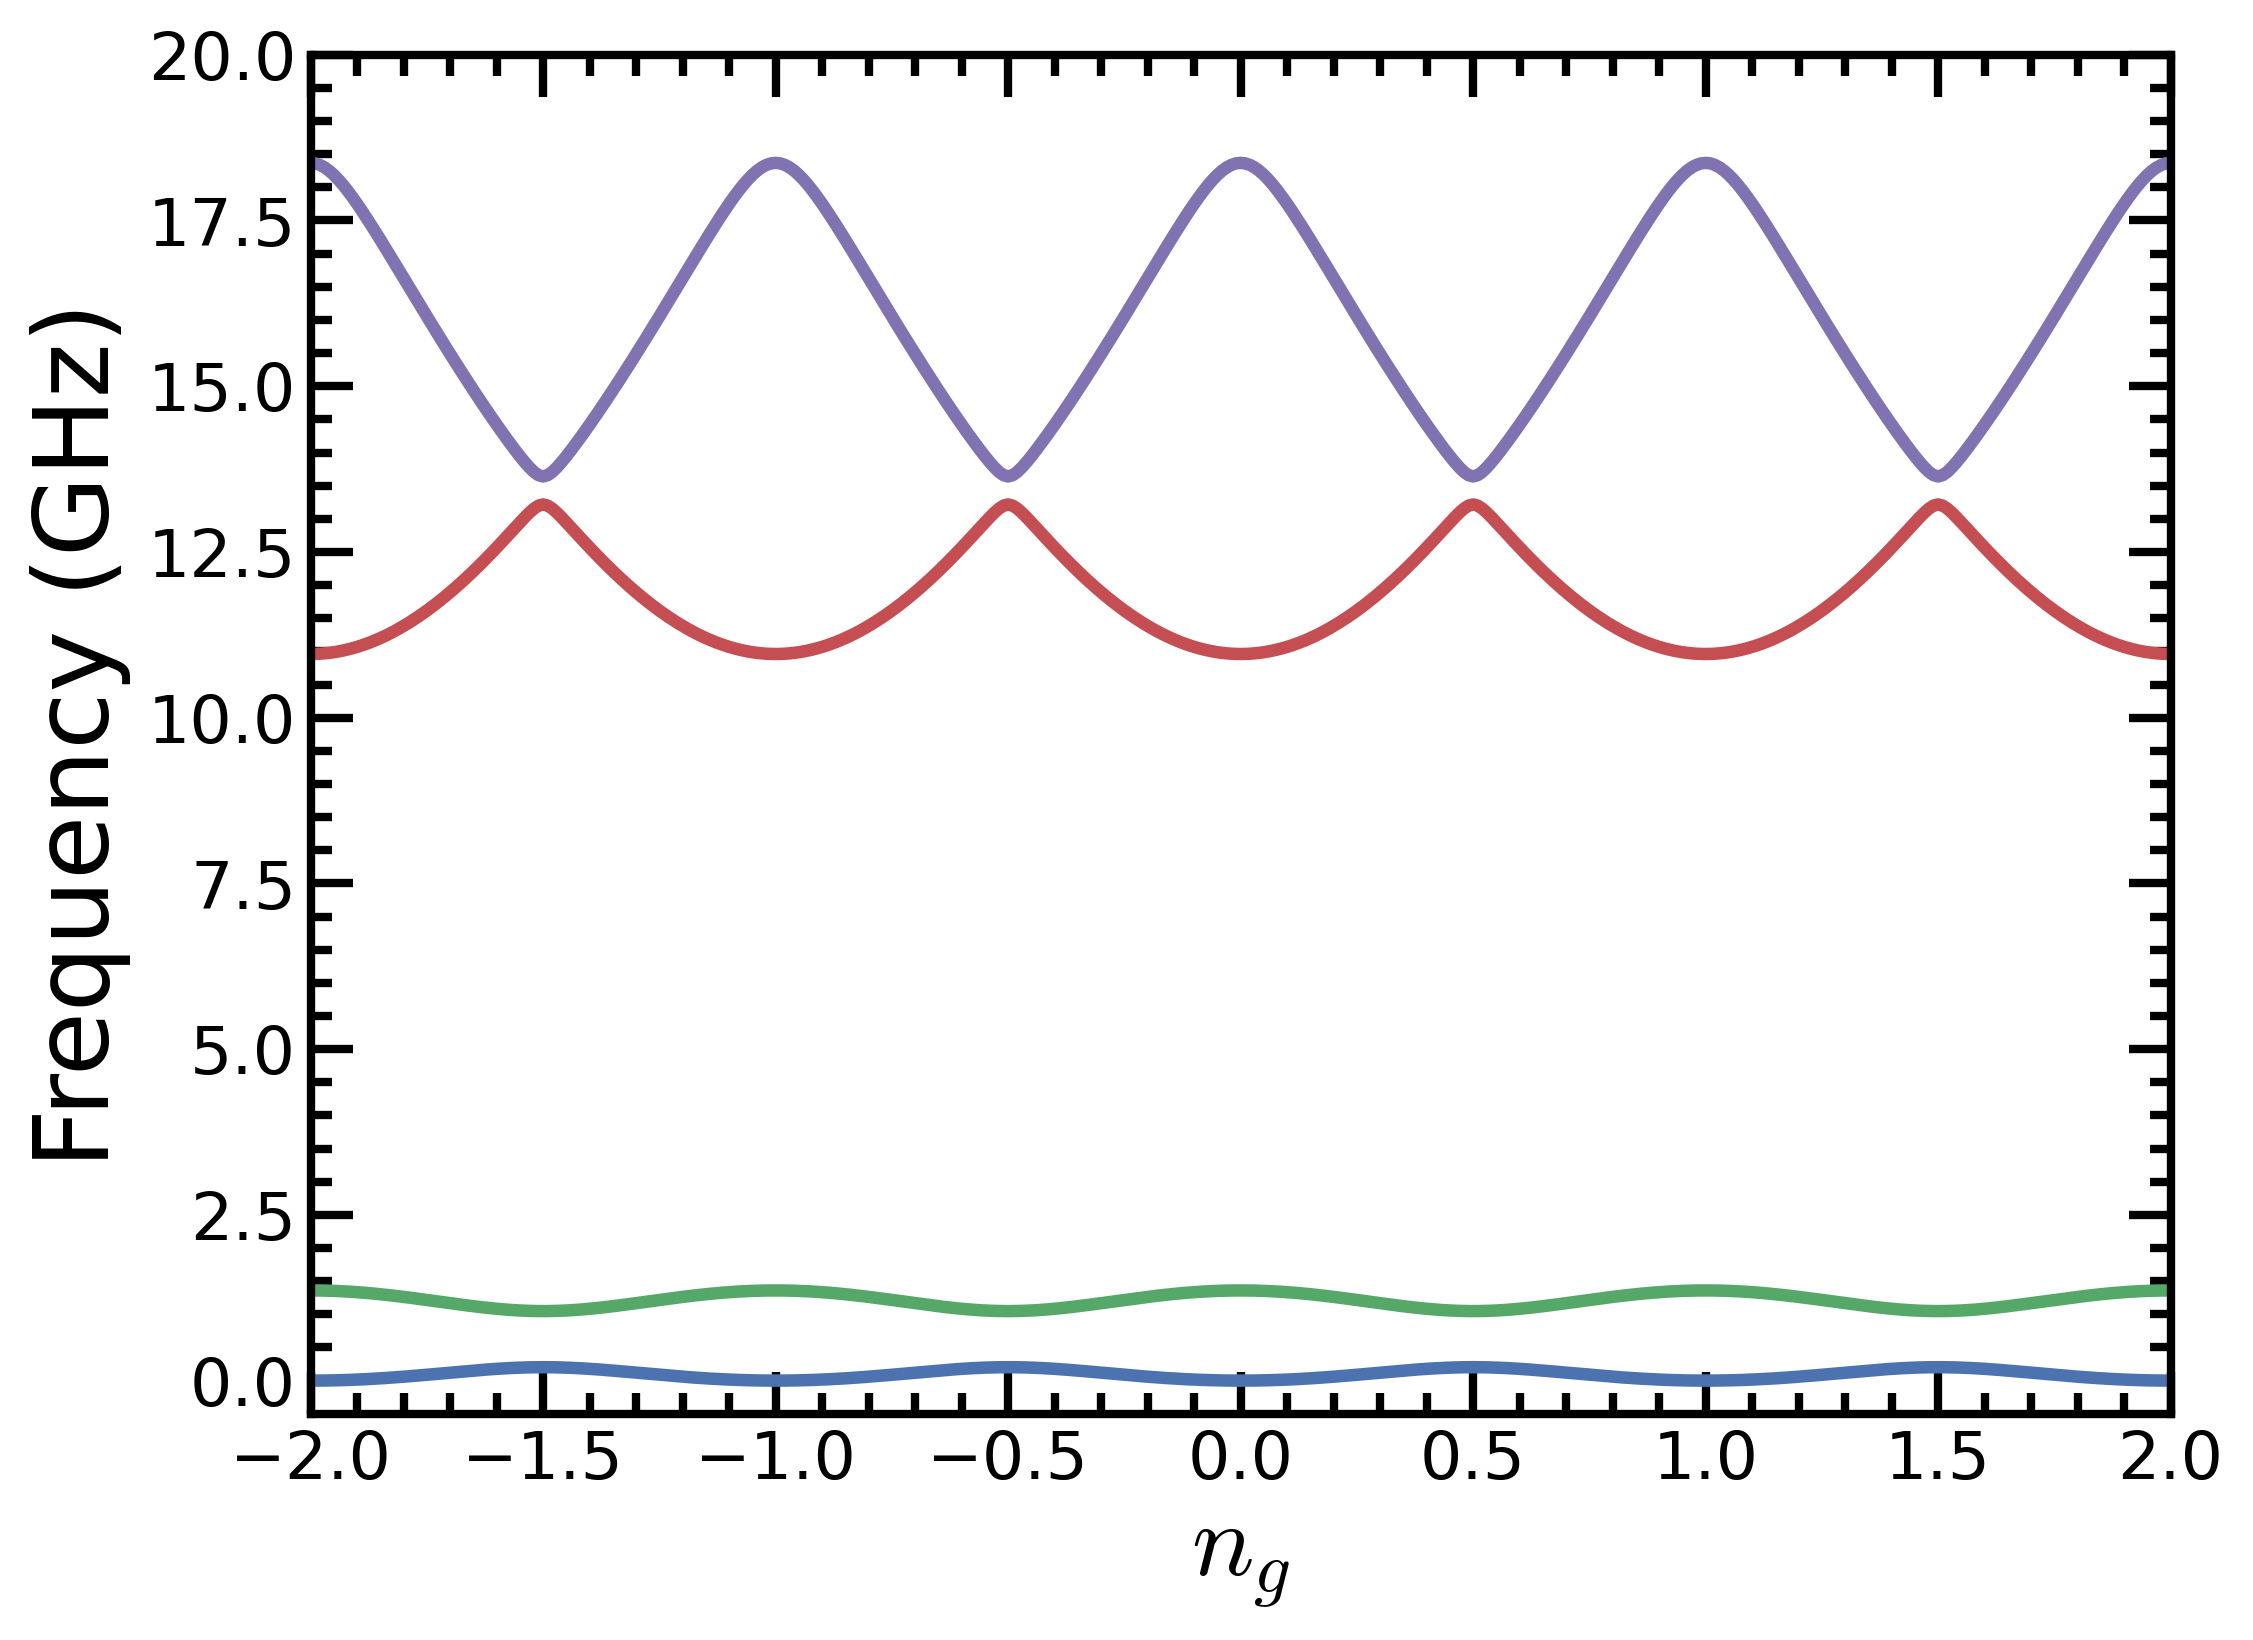

In [135]:
plt.figure(figsize=[8,6])
for idx_lvl in range(0,N):
    plt.plot(ng_array, energies[:,idx_lvl]-np.min(energies[:,0]))
plt.ylim([-0.5,20])
plt.xlabel('$n_g$')
plt.ylabel('Frequency (GHz)')
plt.xlim([ng_array[0], ng_array[-1]])
# plt.savefig('CPB_spectrum1.png')

In [136]:
#Wavefunctions in charge basis
ng = 0.0
energies = np.zeros(2*N+1)
wavefunction = np.zeros((2*N+1, 2*N+1))
energies, wavefunction = hamiltonian_charge(N, Ec, Ej1, Ej2, ng).eigenstates()

<ipython-input-137-9f366a61bc61>:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


(-10.0, 10.0)

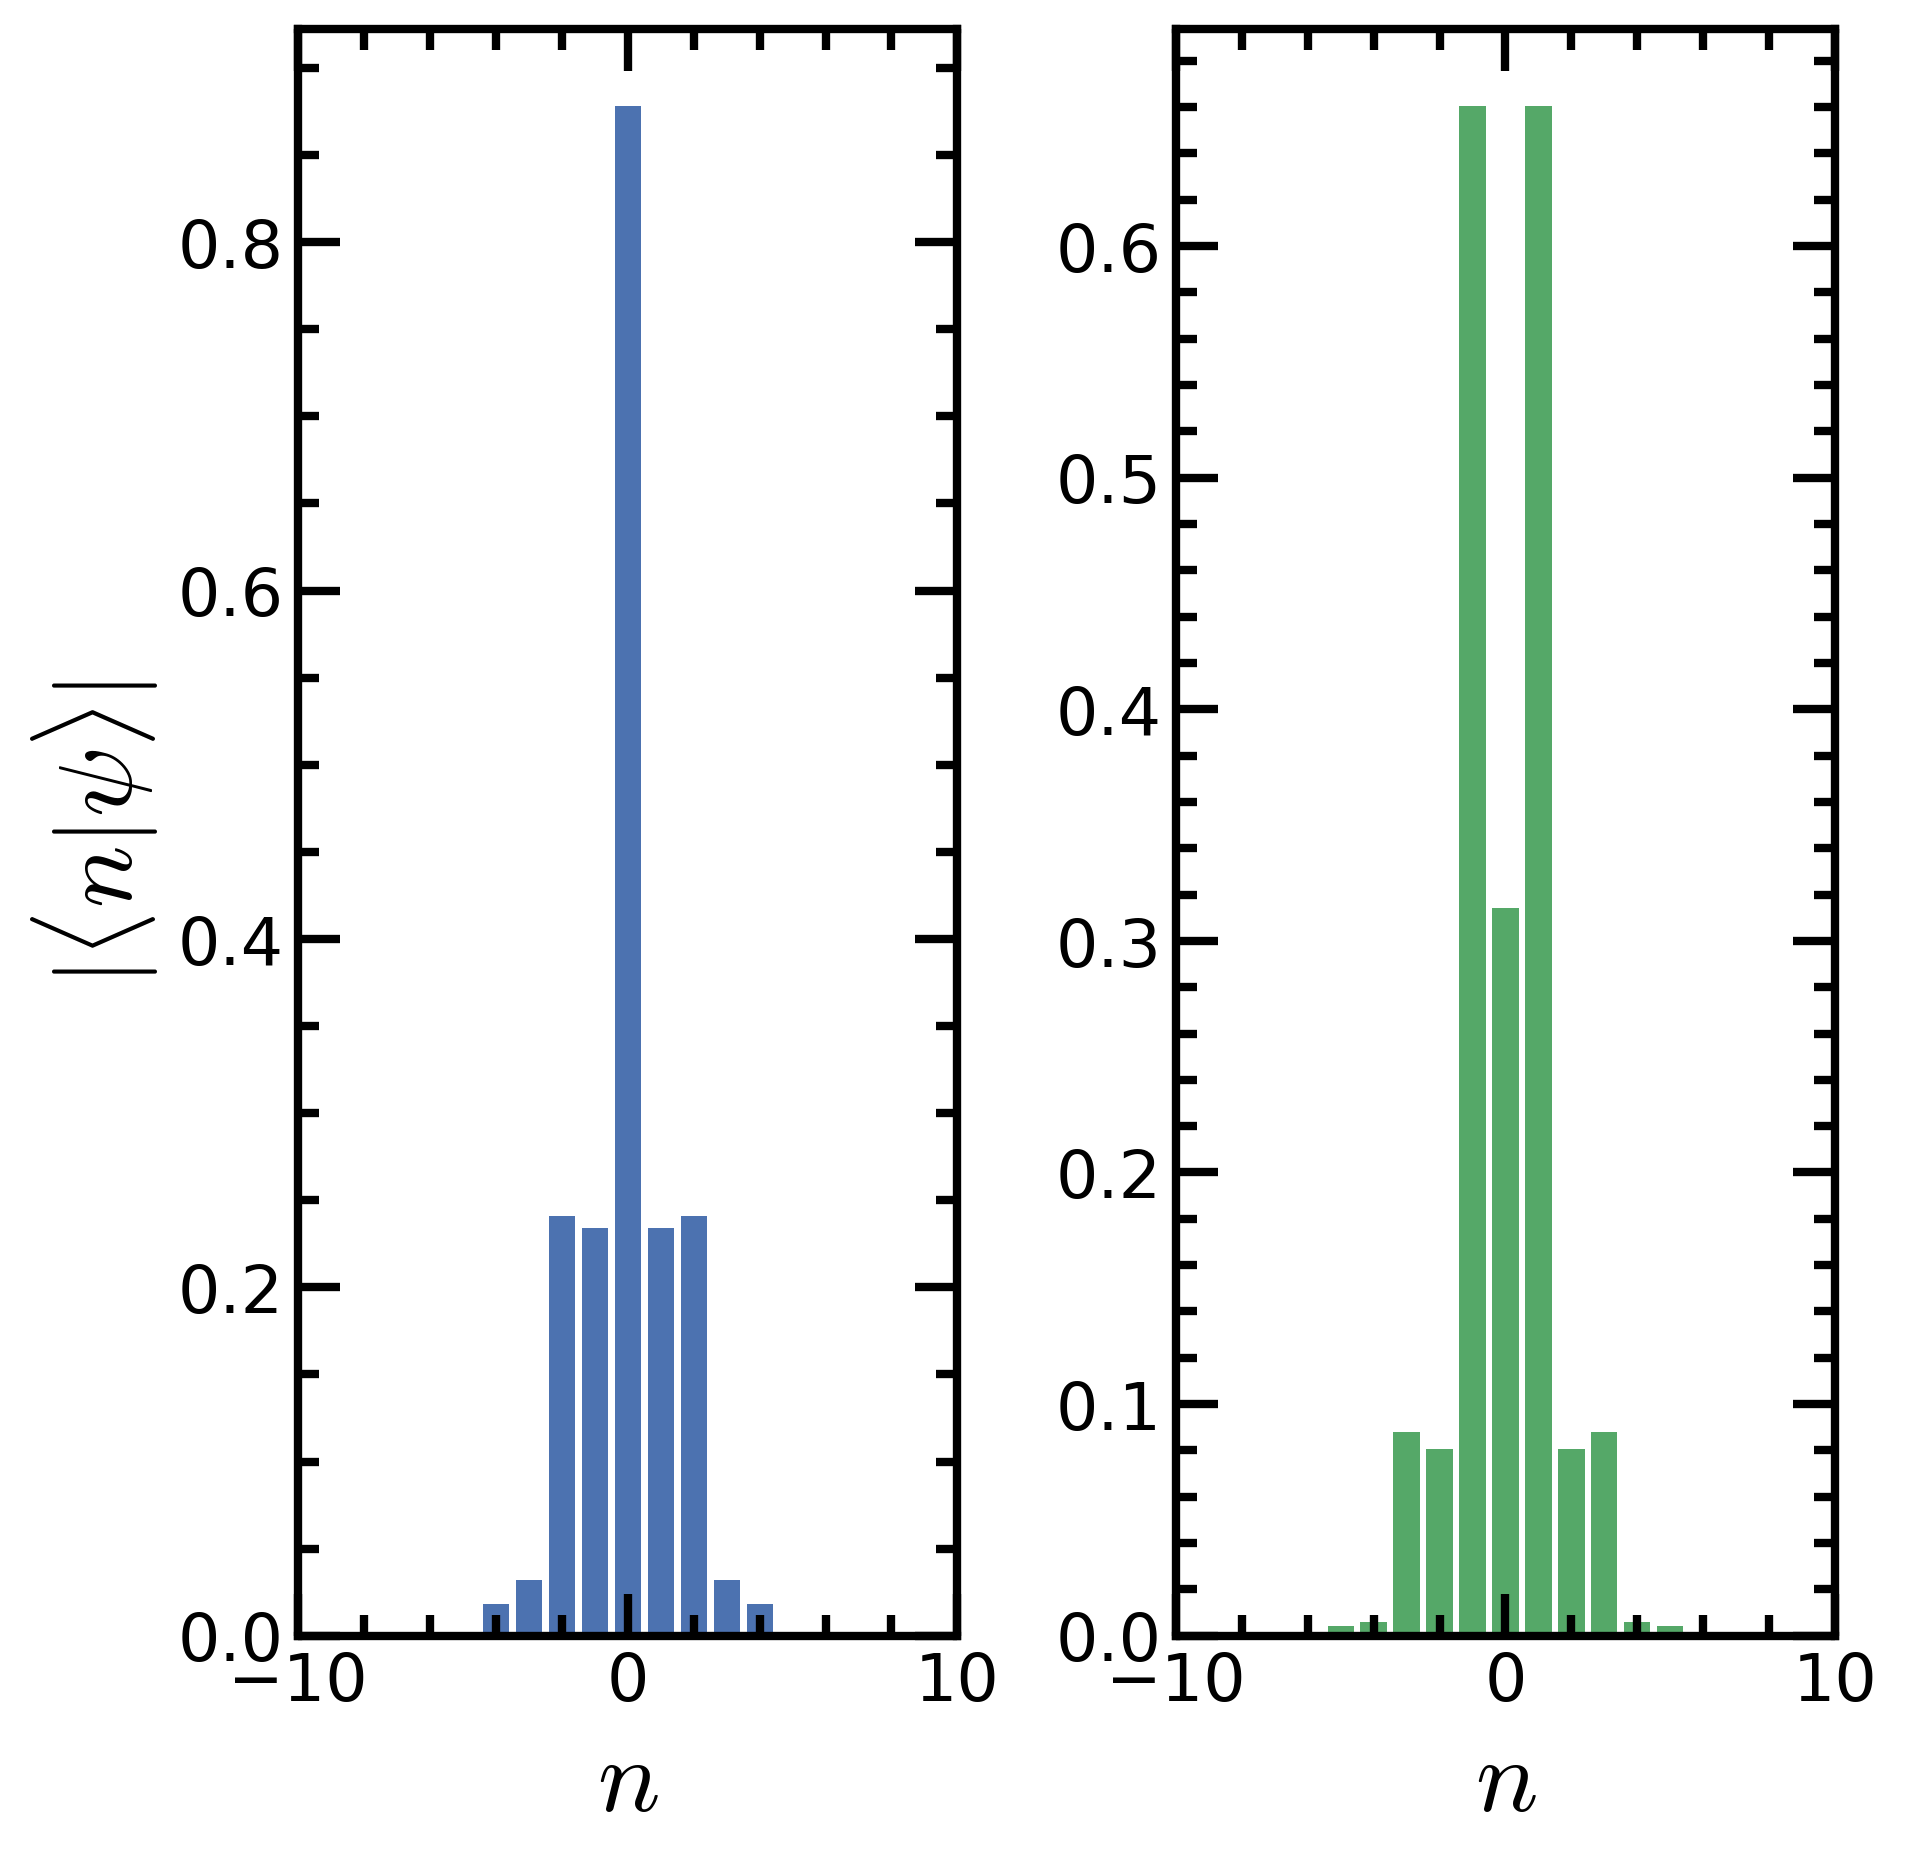

In [137]:
n = np.linspace(-N,N,2*N+1)
fig, ax = plt.subplots(1,2, figsize = [6,6], constrained_layout=True)
fig.tight_layout()
# plt.subplots_adjust(left = 0, right = 1.1)

state_to_plot = 0
ax[0].bar(n, abs(wavefunction[state_to_plot].full()[:,0]))
ax[0].set_xlabel('$n$')
ax[0].set_ylabel(r'$|\langle n|\psi \rangle | $')
ax[0].set_xlim([-10,10])

state_to_plot = 1
ax[1].bar(n, abs(wavefunction[state_to_plot].full()[:,0]), color = 'C1')
ax[1].set_xlabel('$n$')
# ax[1].set_ylabel(r'$|\langle n|$' + str(state_to_plot)+ r'$ \rangle |$')
ax[1].set_xlim([-10,10])

### Phase basis

In [145]:
#Solve in phase basis
Nphi = 601
Ej2 = 10
Ej1 = 1
Ec = 1
ng = 0
phi = np.linspace(-0.5,1.5,2*Nphi+1)*np.pi
phi_op = np.diag(phi)
dphi = phi[-1]-phi[-2]
dphi_coeff = -1.0j/(2*dphi)
n_op = dphi_coeff*(np.diag(np.ones(2*Nphi), 1) - np.diag(np.ones(2*Nphi), -1))
def hamiltonian_phase(Ec, Ej1, Ej2, ng):
    m = 4*Ec*(Qobj(n_op)-ng)**2 - Ej1*Qobj(phi_op).cosm() - Ej2*Qobj(2*phi_op).cosm()
    return m
energies, wavefunction = hamiltonian_phase(Ec, Ej1, Ej2, ng).eigenstates()

(-0.5, 1.5)

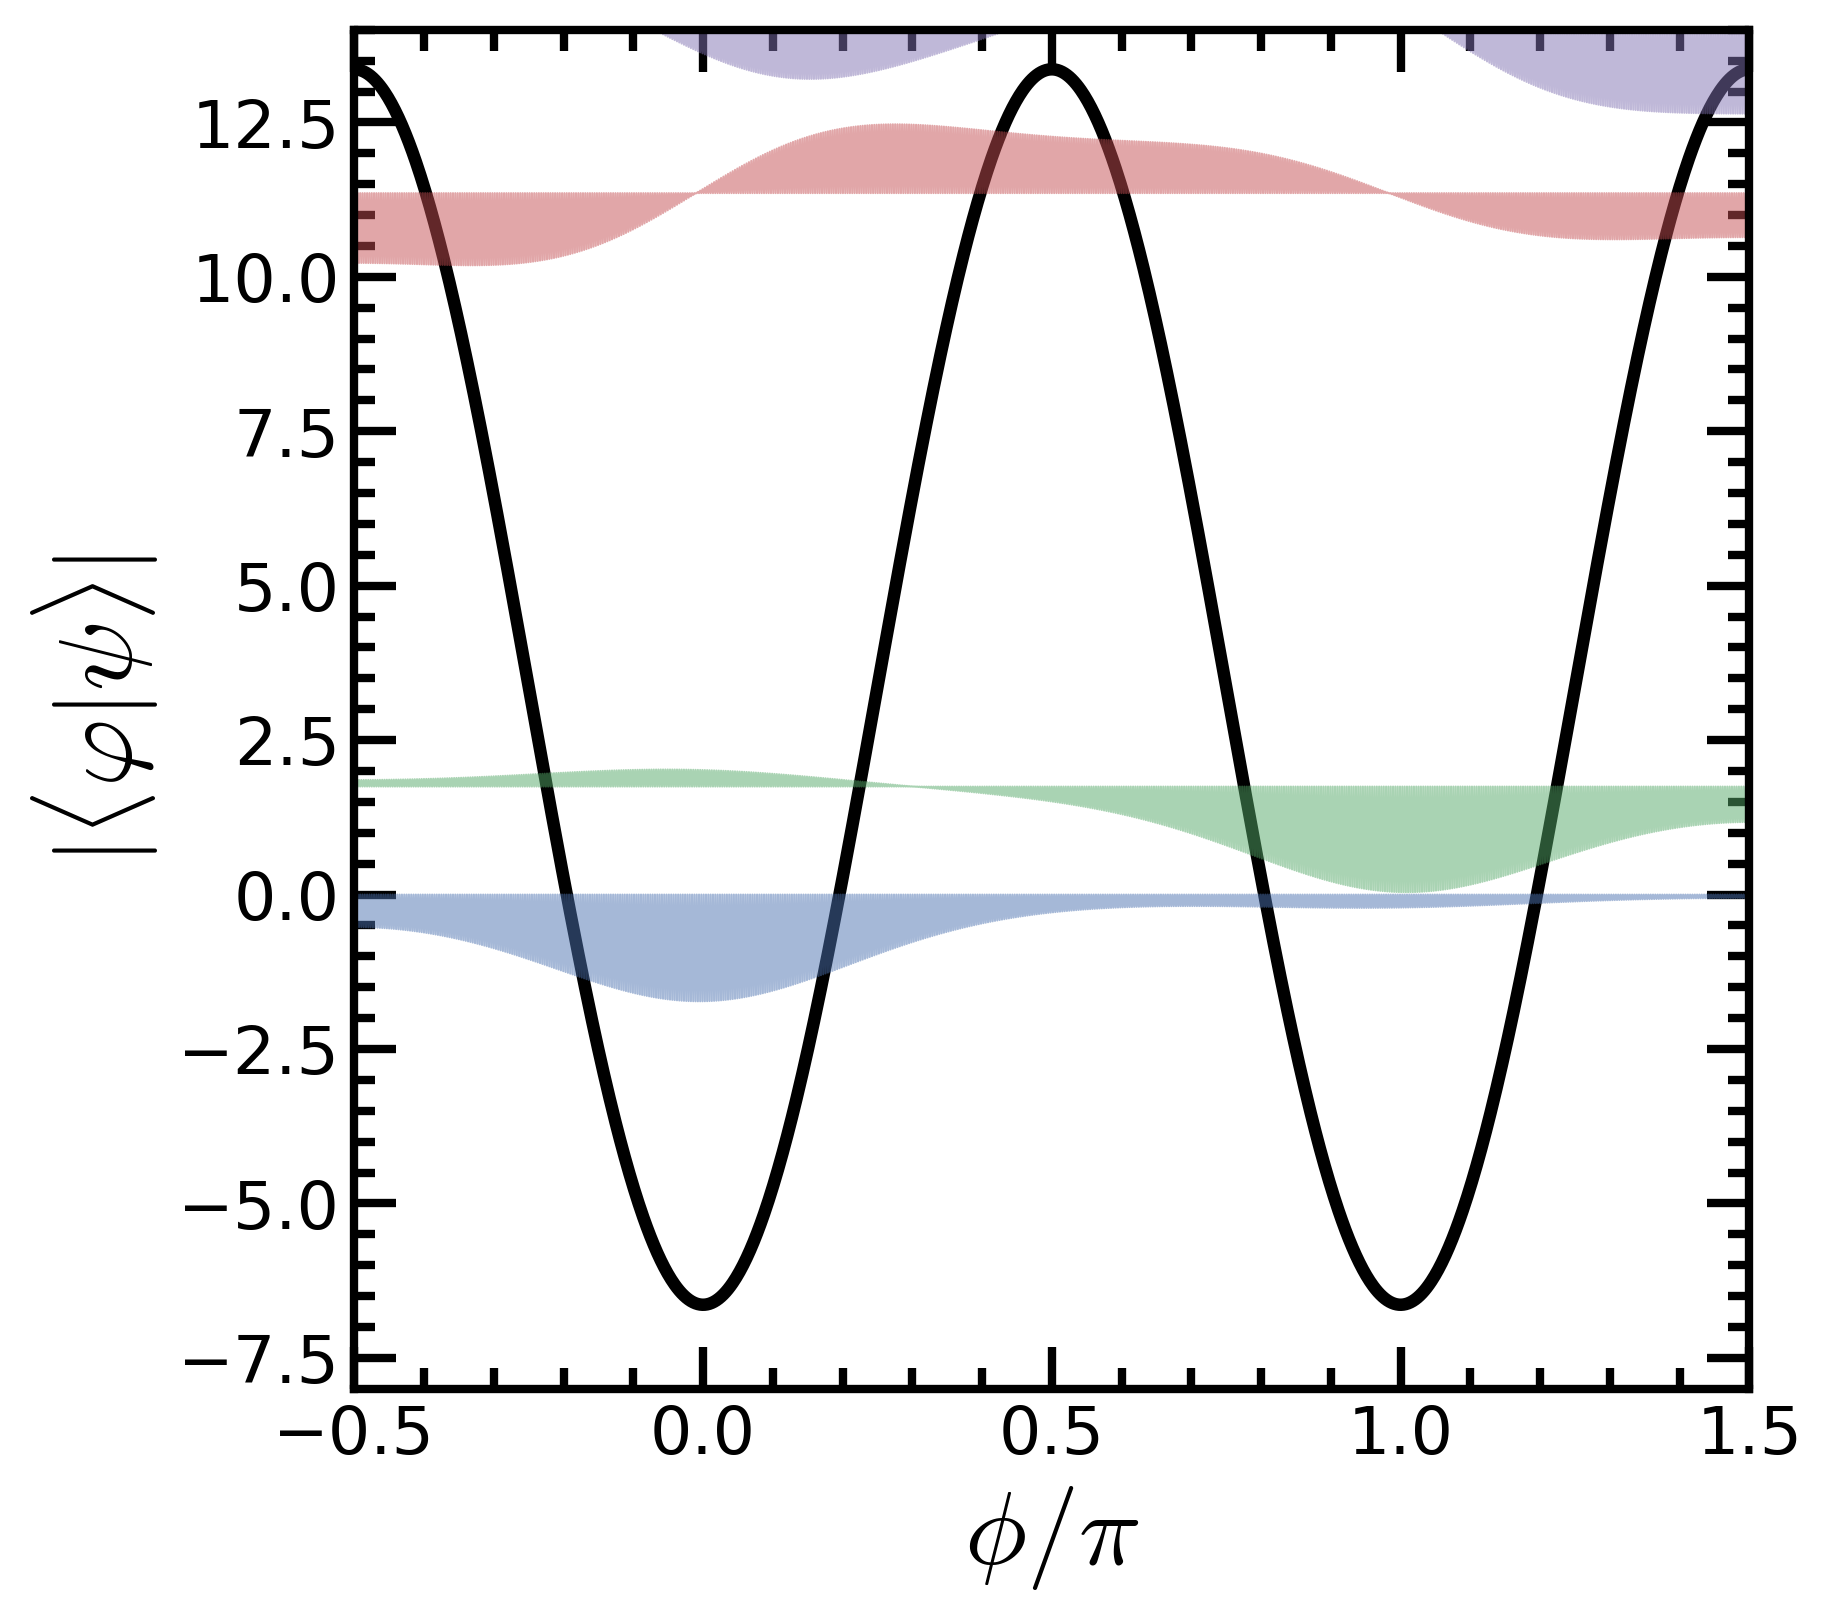

In [146]:
plt.figure(figsize =[6,6])
plt.plot(phi/np.pi, -Ej*np.cos(2*phi)-energies[0], color = 'k')
for state_to_plot in range(0,17,2):
    plt.plot(phi/np.pi, 2*np.real(wavefunction[state_to_plot].full()[:,0])*10+energies[state_to_plot]-energies[0], alpha = 0.5, linewidth = 0.5) 
plt.ylim([-8,14])
plt.xlabel('$\phi / \pi$')
plt.ylabel(r'$|\langle \varphi|\psi \rangle | $')
plt.xlim([phi[0]/np.pi, phi[-1]/np.pi])